## Import necessesary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

#### Loading and exploring a single dataset

In [2]:
df = pd.read_csv('csvs/a1.csv', index_col = 0)
df.head()

,Count
Words,
perch,32
of,3832
the,6399
devil,33
part,55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11330 entries, perch to spell
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   11330 non-null  int64
dtypes: int64(1)
memory usage: 177.0+ KB


In [4]:
df.describe()

,Count
count,11330.000000
mean,11.511033
std,111.740866
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,6399.000000


#### Load csv file assosiated with every authors work
#### Concatenate every work and create a single dataframe

In [5]:
def get_dataset(author, num):
    """
    This function loads the desired csv file and 
    convert the values of `Count` column to `Frequency` 
    by dividing each value by total sum of count then
    rename the `Count` column with authors work and
    transpose the whole dataframe
    """
    path = 'csvs/' + author + str(num) + '.csv'
    df = pd.read_csv(path, index_col=0)
    total = df.Count.sum()
    df.loc[:, 'Count'] = df.Count/total
    df = df[df["Count"] > 0.0005]
    df.rename(columns={"Count": author+str(num)}, inplace=True)
    return df.transpose()

In [6]:
# Concatenate dataframes related to author A with author B
df = pd.concat([get_dataset(author, i) for author in ["a", "b"] for i in range(1, 6)])

# Concatenate "unknown" authors with resultant dataframe in previous step
df = pd.concat([df] + [ get_dataset(author, i) for author in ["u"] for i in ['a', 'b']])

In [7]:
# Concatenated dataframe (Final dataframe)
df

Words,of,the,i,said,gregory,compton,back,his,head,eyes,...,purpose,tears,opportunity,begin,doth,tender,lover,wine,bull,ashamed
a1,0.029382,0.049065,0.013610,0.002147,0.002607,0.000958,0.001004,0.009707,0.000820,0.001257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a2,0.032751,0.055706,0.015578,0.001715,NaN,NaN,0.000704,0.008639,0.000598,0.001197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a3,0.029199,0.063049,0.011053,0.001584,NaN,NaN,0.000977,0.014844,0.000944,0.001567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a4,0.026880,0.042672,0.016355,0.001507,NaN,NaN,0.000952,0.007428,0.000671,0.001366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a5,0.024663,0.045215,0.027519,0.004285,NaN,NaN,0.000836,0.008256,0.000975,0.001463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b1,0.046837,0.066431,0.007732,0.001125,NaN,NaN,NaN,0.008759,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b2,0.028159,0.047901,0.025633,0.003683,NaN,NaN,NaN,0.010042,NaN,0.000557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b3,0.030103,0.048090,0.017762,0.002728,NaN,NaN,NaN,0.011380,NaN,0.000507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b4,0.041287,0.059278,0.013839,0.000761,NaN,NaN,NaN,0.008673,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b5,0.031992,0.049854,0.031992,0.001568,NaN,NaN,0.000817,0.008986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Drop columns if it contain atleast one NaN value

In [8]:
df.isnull().any()

Words
of         False
the        False
i          False
said        True
gregory     True
           ...  
tender      True
lover       True
wine        True
bull        True
ashamed     True
Length: 597, dtype: bool

In [9]:
df.dropna(axis=1, inplace=True)
df

Words,of,the,i,his,in,which,that,is,what,them,...,good,my,you,first,are,may,me,your,how,must
a1,0.029382,0.049065,0.013610,0.009707,0.016332,0.001587,0.013679,0.004946,0.002737,0.002293,...,0.001549,0.002576,0.012184,0.001196,0.002929,0.000790,0.003113,0.002507,0.001020,0.000882
a2,0.032751,0.055706,0.015578,0.008639,0.017635,0.001564,0.014869,0.006105,0.002233,0.002172,...,0.001091,0.003440,0.009378,0.001041,0.003490,0.000739,0.002489,0.002213,0.000578,0.000774
a3,0.029199,0.063049,0.011053,0.014844,0.015535,0.002393,0.012552,0.004566,0.002022,0.002595,...,0.000994,0.002308,0.007329,0.001213,0.002359,0.000590,0.002376,0.000977,0.000927,0.000910
a4,0.026880,0.042672,0.016355,0.007428,0.016231,0.001110,0.013896,0.005118,0.003014,0.002228,...,0.000985,0.003197,0.013796,0.001043,0.003064,0.000944,0.003793,0.002915,0.000878,0.001532
a5,0.024663,0.045215,0.027519,0.008256,0.013028,0.001811,0.015676,0.010381,0.003414,0.001951,...,0.001986,0.003832,0.016721,0.000906,0.004981,0.000906,0.004877,0.003274,0.001359,0.002160
b1,0.046837,0.066431,0.007732,0.008759,0.020416,0.010240,0.015646,0.014567,0.002776,0.002980,...,0.000857,0.002385,0.000968,0.001691,0.005960,0.002583,0.001184,0.000560,0.001090,0.001324
b2,0.028159,0.047901,0.025633,0.010042,0.016349,0.008624,0.012952,0.007758,0.003463,0.001600,...,0.001680,0.010369,0.013523,0.001081,0.002728,0.001633,0.006523,0.003809,0.001320,0.001605
b3,0.030103,0.048090,0.017762,0.011380,0.016296,0.009857,0.011507,0.007126,0.003066,0.001813,...,0.001937,0.006370,0.010117,0.001123,0.003231,0.002183,0.004430,0.003611,0.000779,0.001706
b4,0.041287,0.059278,0.013839,0.008673,0.020597,0.011602,0.012663,0.008373,0.001822,0.002676,...,0.001338,0.005420,0.000876,0.000876,0.004036,0.002468,0.002999,0.000531,0.000600,0.000900
b5,0.031992,0.049854,0.031992,0.008986,0.017222,0.009428,0.011503,0.004217,0.002031,0.002208,...,0.001435,0.017420,0.002561,0.001391,0.001921,0.000640,0.012254,0.000684,0.000618,0.000729


# Visualizations

- Dimensions need to be normalized inorder to get better results.
- Here our dimensions are normalized since the values are converted to frequencies.

### 2-D Analysis

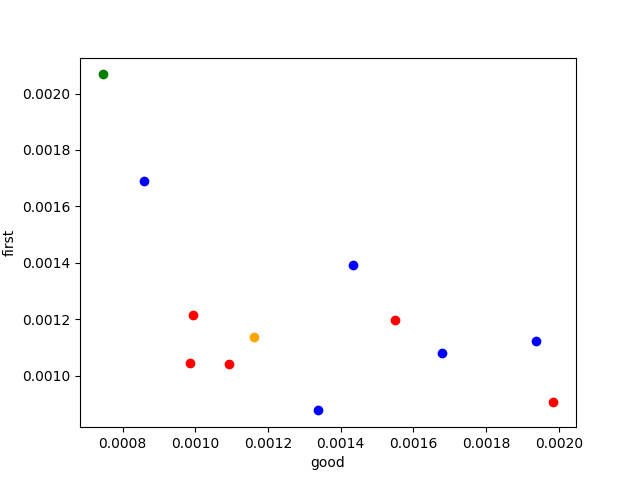

In [10]:
def plot_word_2d(w1, w2):
    plt.scatter(df.loc["a1":"a5", w1], df.loc["a1":"a5", w2], c="r")  # Atherton, Gertrude Franklin Horn
    plt.scatter(df.loc["b1":"b5", w1], df.loc["b1":"b5", w2], c="b")  # Elliot George
    plt.scatter(df.loc["ua", w1], df.loc["ua", w2], c="orange")  # unknown work 1
    plt.scatter(df.loc["ub", w1], df.loc["ub", w2], c="g")  # unknown work 2
    plt.xlabel(f"{w1}")
    plt.ylabel(f"{w2}")
    plt.show()
    
plot_word_2d("good", "first")

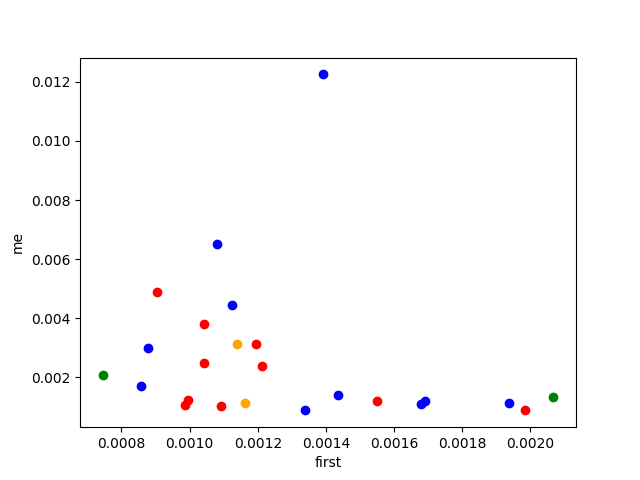

In [11]:
def plot_word_2d(w1, w2):
    plt.scatter(df.loc["a1":"a5", w1], df.loc["a1":"a5", w2], c="r")  # Atherton, Gertrude Franklin Horn
    plt.scatter(df.loc["b1":"b5", w1], df.loc["b1":"b5", w2], c="b")  # Elliot George
    plt.scatter(df.loc["ua", w1], df.loc["ua", w2], c="orange")  # unknown work 1
    plt.scatter(df.loc["ub", w1], df.loc["ub", w2], c="g")  # unknown work 2
    plt.xlabel(f"{w1}")
    plt.ylabel(f"{w2}")
    plt.show()
    
plot_word_2d("first", "me")

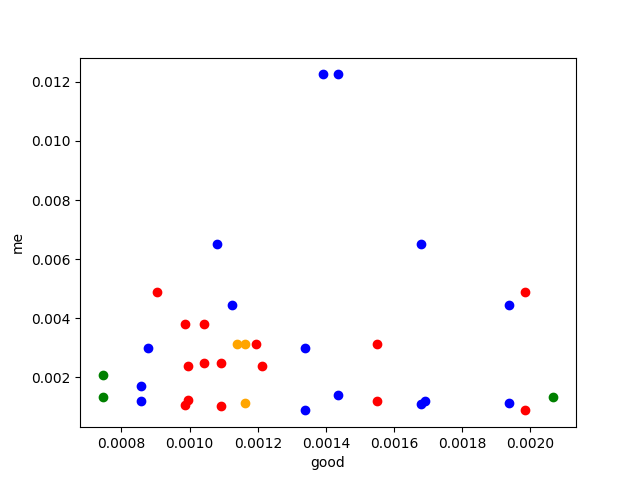

In [12]:
def plot_word_2d(w1, w2):
    plt.scatter(df.loc["a1":"a5", w1], df.loc["a1":"a5", w2], c="r")  # Atherton, Gertrude Franklin Horn
    plt.scatter(df.loc["b1":"b5", w1], df.loc["b1":"b5", w2], c="b")  # Elliot George
    plt.scatter(df.loc["ua", w1], df.loc["ua", w2], c="orange")  # unknown work 1
    plt.scatter(df.loc["ub", w1], df.loc["ub", w2], c="g")  # unknown work 2
    plt.xlabel(f"{w1}")
    plt.ylabel(f"{w2}")
    plt.show()
    
plot_word_2d("good", "me")

### 3-D Analysis

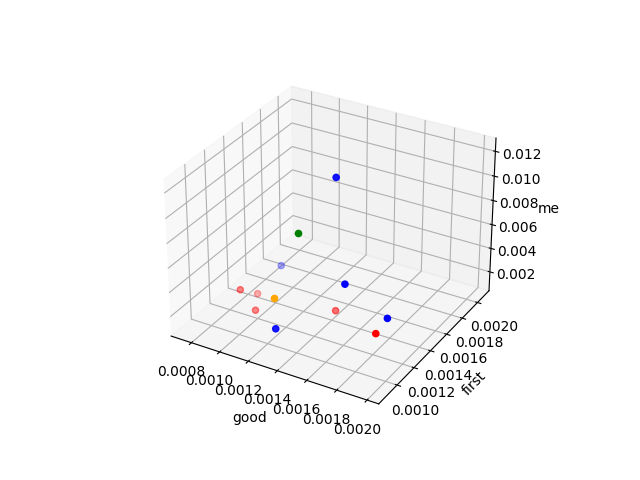

In [13]:
def plot_word_3d(w1, w2, w3):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    
    ax.scatter(df.loc["a1":"a5", w1], df.loc["a1":"a5", w2], df.loc["a1":"a5", w3], c="r")  # Atherton, Gertrude Franklin Horn
    ax.scatter(df.loc["b1":"b5", w1], df.loc["b1":"b5", w2], df.loc["b1":"b5", w3], c="b")  # Elliot George
    ax.scatter(df.loc["ua", w1], df.loc["ua", w2], df.loc["ua", w3], c="orange")  # unknown work 1
    ax.scatter(df.loc["ub", w1], df.loc["ub", w2], df.loc["ub", w3], c="g")  # unknown work 2
    ax.set_xlabel(f"{w1}")
    ax.set_ylabel(f"{w2}")
    ax.set_zlabel(f"{w3}")
    plt.show()
    
plot_word_3d("good", "first", "me")

# KNN - K- Nearest Neighbors

- `KNN` is short for **k-nearest neighbors** is a machine learning algorithm that uses a data set to classify new data points based on their similarity to the existing data. 
- KNN is a non-parametric method, which means that it makes no assumptions about the underlying data. Instead, it relies on the relationships among the data points to make predictions. 
- The algorithm works by calculating the distance between a new data point and all the training data points, and then choosing the k-nearest data points (where k is a user-specified parameter) to determine the class of the new data point. 
- The class of the new data point is then determined by majority vote among the k-nearest neighbors.

In [14]:
ab = df.loc["a1":"b5", ["good", "me"]].copy()
ua = df.loc["ua", ["good", "me"]].copy()
ub = df.loc["ub", ["good", "me"]].copy()
ab

Words,good,me
a1,0.001549,0.003113
a2,0.001091,0.002489
a3,0.000994,0.002376
a4,0.000985,0.003793
a5,0.001986,0.004877
b1,0.000857,0.001184
b2,0.001680,0.006523
b3,0.001937,0.004430
b4,0.001338,0.002999
b5,0.001435,0.012254


In [15]:
ua

Words
good    0.001162
me      0.003124
Name: ua, dtype: float64

In [16]:
ub

Words
good    0.000744
me      0.001323
Name: ub, dtype: float64

In [15]:
ab.loc[:, "ua_distance"] = ((ab["good"] - ua["good"].item())**2 + (ab["me"] - ua["me"].item())**2)**0.5
ab

Words,good,me,ua_distance
a1,0.001549,0.003113,0.000387
a2,0.001091,0.002489,0.000638
a3,0.000994,0.002376,0.000767
a4,0.000985,0.003793,0.000692
a5,0.001986,0.004877,0.001937
b1,0.000857,0.001184,0.001964
b2,0.001680,0.006523,0.003438
b3,0.001937,0.004430,0.001519
b4,0.001338,0.002999,0.000216
b5,0.001435,0.012254,0.009134


In [16]:
ab.loc[:, "ub_distance"] = ((ab["good"] - ub["good"].item())**2 + (ab["me"] - ub["me"].item())**2)**0.5
ab

Words,good,me,ua_distance,ub_distance
a1,0.001549,0.003113,0.000387,0.001962
a2,0.001091,0.002489,0.000638,0.001216
a3,0.000994,0.002376,0.000767,0.001082
a4,0.000985,0.003793,0.000692,0.002481
a5,0.001986,0.004877,0.001937,0.003764
b1,0.000857,0.001184,0.001964,0.000180
b2,0.001680,0.006523,0.003438,0.005283
b3,0.001937,0.004430,0.001519,0.003328
b4,0.001338,0.002999,0.000216,0.001777
b5,0.001435,0.012254,0.009134,0.010952


In [17]:
ab = ab.sort_values("ua_distance")
ab

Words,good,me,ua_distance,ub_distance
b4,0.001338,0.002999,0.000216,0.001777
a1,0.001549,0.003113,0.000387,0.001962
a2,0.001091,0.002489,0.000638,0.001216
a4,0.000985,0.003793,0.000692,0.002481
a3,0.000994,0.002376,0.000767,0.001082
b3,0.001937,0.004430,0.001519,0.003328
a5,0.001986,0.004877,0.001937,0.003764
b1,0.000857,0.001184,0.001964,0.000180
b2,0.001680,0.006523,0.003438,0.005283
b5,0.001435,0.012254,0.009134,0.010952


In [18]:
ab = ab.reset_index()
ab

Words,index,good,me,ua_distance,ub_distance
0,b4,0.001338,0.002999,0.000216,0.001777
1,a1,0.001549,0.003113,0.000387,0.001962
2,a2,0.001091,0.002489,0.000638,0.001216
3,a4,0.000985,0.003793,0.000692,0.002481
4,a3,0.000994,0.002376,0.000767,0.001082
5,b3,0.001937,0.004430,0.001519,0.003328
6,a5,0.001986,0.004877,0.001937,0.003764
7,b1,0.000857,0.001184,0.001964,0.000180
8,b2,0.001680,0.006523,0.003438,0.005283
9,b5,0.001435,0.012254,0.009134,0.010952


In [19]:
ab = ab.rename(columns={"index": "Work"})

In [38]:
k = 7

ua_knn = ab.loc[0:k-1, ["Work", "ua_distance"]]
ua_knn

Words,Work,ua_distance
0,b4,0.000216
1,a1,0.000387
3,a4,0.000692
5,b3,0.001519
6,a5,0.001937


In [39]:
ua_votes = [work[:-1] for work in ua_knn["Work"].values.tolist()] 
ua_votes

['b', 'a', 'a', 'b', 'a']

In [40]:
ab = ab.sort_values("ub_distance")
ab

Words,Work,good,me,ua_distance,ub_distance
7,b1,0.000857,0.001184,0.001964,0.000180
4,a3,0.000994,0.002376,0.000767,0.001082
2,a2,0.001091,0.002489,0.000638,0.001216
0,b4,0.001338,0.002999,0.000216,0.001777
1,a1,0.001549,0.003113,0.000387,0.001962
3,a4,0.000985,0.003793,0.000692,0.002481
5,b3,0.001937,0.004430,0.001519,0.003328
6,a5,0.001986,0.004877,0.001937,0.003764
8,b2,0.001680,0.006523,0.003438,0.005283
9,b5,0.001435,0.012254,0.009134,0.010952


In [41]:
ub_knn = ab.loc[0:k-1, ['Work', 'ub_distance']]
ub_knn

Words,Work,ub_distance
0,b4,0.001777
1,a1,0.001962
3,a4,0.002481
5,b3,0.003328
6,a5,0.003764


In [42]:
ub_votes = [work[:-1] for work in ub_knn["Work"].values.tolist()] 
ub_votes

['b', 'a', 'a', 'b', 'a']

In [43]:
results = {candidate:ua_votes.count(candidate) for candidate in list(set(ua_votes))}
results

{'a': 3, 'b': 2}

In [44]:
knn_classification = max([ (tu[1], tu[0]) for tu in results.items() ])[1]
print(f"Work was classified as {knn_classification}!")

Work was classified as a!


In [21]:
def txtTocsv(fileName):
    import pandas as pd
    import re
    path = 'authors/' + fileName + '.txt'
    words = dict()
    with open(path, 'r') as file:
        lines = [line.strip().lower() for line in file.readlines() if line.strip()]
        pattern = ':;{}[]\\|+=-_<>,.?/!@#$%^&*()\'\"'
        for line in lines:
            for word in line.split():
                word = ''.join(filter(lambda k: k not in pattern, word))
                word = word.lstrip('“”’')
                word = word.rstrip('“”’')
                if word in words: words[word] += 1
                else: words[word] = 1
        word = words.keys()
        count = words.values()
        print('Unique words : ', len(word))
        data = {'Words': word, 'Count': count}
        df = pd.DataFrame.from_dict(data)
        print('Words,Count')
        for i in range(len(df)):
            print("{},{}".format(df['Words'][i], df['Count'][i]))
        
for i in range(1, 2):
    filename = 'a' + str(i)
    txtTocsv(filename)
    filename = 'b' + str(i)
    txtTocsv(filename)
txtTocsv('ua')
txtTocsv('ub')

Unique words :  11330
Words,Count
perch,32
of,3832
the,6399
devil,33
part,55
i,1775
shining,6
mountains,35
said,280
gregory,340
compton,125
softly,13
throwing,4
back,131
his,1266
head,107
eyes,164
travelling,6
along,39
hard,45
bright,13
outlines,1
above,54
high,65
valley,7
in,2130
which,207
ranch,81
lay,20
that,1784
is,645
what,357
indians,2
called,33
them,299
before,204
white,62
man,279
came,61
wife,84
yawned,6
frankly,5
pity,8
they,592
don’t,279
shine,4
inside,27
as,1165
well,217
outwhat,1
we’ve,13
got,140
em,23
who,234
knows,45
we,146
that’s,71
trouble,22
but,1177
although,147
she,1879
spoke,21
tartly,4
nestled,3
into,269
arm,13
for,1185
was,1611
not,735
unamiable,1
had,1583
been,407
married,57
sixteen,3
months,62
and,3962
still,92
fond,15
her,2114
husband,91
a,2943
way,108
moreover,23
cherished,5
resentments,1
open,47
secret,24
never,260
forgot,18
won,14
prize,2
men,271
go,223
many,109
girls,35
buttea,1
wanted,52
to,3477
marry,49
only,254
because,80
he,1764
inherited,6
eleven,7
hun

Unique words :  15635
Words,Count
title,18
and,6849
prologue,11
to,4898
book,176
i,1326
here,94
beginneth,3
the,11392
volume,23
entitled,5
named,13
recuyell,3
of,8032
histories,23
troy,11
composed,13
drawn,16
out,244
divers,36
books,71
latin,30
into,271
french,66
by,1421
right,54
venerable,2
person,39
worshipful,4
man,337
raoul,2
le,18
feure,2
priest,15
chaplain,1
unto,65
noble,87
glorious,9
mighty,22
prince,25
in,3501
his,1502
time,293
philip,6
duke,17
burgundy,5
brabant,4
etc,7
year,20
incarnation,6
our,417
lord,68
god,240
a,2597
thousand,30
four,27
hundred,26
sixty,6
translated,36
english,114
william,9
caxton,8
mercer,2
city,20
london,13
at,580
commandment,8
high,39
virtuous,12
princess,4
redoubted,5
lady,30
margaret,3
grace,37
duchess,4
lotrylk,1
which,1756
said,193
translation,22
work,250
was,664
begun,16
bruges,4
county,2
flanders,4
first,290
day,95
march,4
eight,7
ended,9
finished,11
holy,42
cologne,4
19th,1
september,1
eleven,3
on,511
that,2683
other,473
side,25
this,1034
leaf,

Unique words :  8777
Words,Count
the,3183
crystal,1
cup,3
chapter,50
i,1215
old,207
age,20
will,121
be,481
served,10
said,161
mrs,105
carteret,128
grimly,5
but,870
suppose,68
you,1084
think,135
am,74
a,2171
long,111
time,182
dying,4
gita,481
made,94
face,70
in,1286
heavy,15
shade,8
of,2068
bedhangings,2
replied,10
politely,2
glad,27
to,2152
here,76
grandmother,53
and,2756
when,240
it’s,76
my,259
turn,23
die,7
i’ll,117
take,82
all,301
choose,8
she,1705
had,1165
crisp,7
clear,16
voice,50
staccato,3
delivery,1
which,72
no,363
attempt,10
modify,1
sickroom,4
lady,20
frowned,15
never,195
cared,8
for,649
your,248
mother,78
soft,21
low,11
‘an,1
excellent,6
thing,56
woman,81
why,55
did,100
not,534
model,3
own,89
upon,31
it,870
do,203
can,76
distort,1
destroy,3
beauty,29
look,84
like,243
boy,24
women,64
were,328
dashing,2
brunettes,1
feminine,22
otherwise,8
they,244
would,341
have,490
men,133
crawling,1
at,518
their,139
feet,36
generation,9
after,129
if,441
crawled,1
feet—which,1
don’t,215
these